## **Лабораторная работа №4**

### **Определение бизнес-целей для решения задач регрессии и классификации**

**Вариант задания:** Набор данных о ценах на акции Walmart.

**Бизнес-цели:**

1. **Регрессия:** Предсказание цены закрытия акции (Close) на основе исторических данных.

2. **Классификация:** Определение направления изменения цены (повышение или понижение) на следующий день, что можно выразить в бинарной метке (например, 1 — цена повысилась, 0 — снизилась). Метка будет рассчитываться как разница между Close сегодняшнего и завтрашнего дня.

**Столбцы датасета и их пояснение:**

*Date* - Дата, на которую относятся данные. Эта характеристика указывает конкретный день, в который происходила торговля акциями Walmart.

*Open* - Цена открытия. Стоимость акций Walmart в начале торгового дня. Это важный показатель, который показывает, по какой цене начались торги в конкретный день, и часто используется для сравнения с ценой закрытия для определения дневного тренда.

*High* - Максимальная цена за день. Наибольшая цена, достигнутая акциями Walmart в течение торгового дня. Эта характеристика указывает, какой была самая высокая стоимость акций за день.

*Low* - Минимальная цена за день. Наименьшая цена, по которой торговались акции Walmart в течение дня.

*Close* - Цена закрытия. Стоимость акций Walmart в конце торгового дня. Цена закрытия — один из основных показателей, используемых для анализа акций, так как она отображает итоговую стоимость акций за день и часто используется для расчета дневных изменений и трендов на длительных временных периодах.

*Adj Close* - Скорректированная цена закрытия. Цена закрытия, скорректированная с учетом всех корпоративных действий.

*Volume* - Объем торгов. Количество акций Walmart, проданных и купленных в течение дня. 

In [9]:
import pandas as pd

df = pd.read_csv("..//static//csv//WMT.csv").head(15000)

print(df.head())
print(df.columns)
display(df.head(15))
print(df.isnull().sum())

       Date       Open       High        Low      Close  Adj Close    Volume
0  1/3/2000  22.791668  23.000000  21.833332  22.270832  14.469358  25109700
1  1/4/2000  21.833332  21.937500  21.395832  21.437500  13.927947  20235300
2  1/5/2000  21.291668  21.458332  20.729168  21.000000  13.643703  21056100
3  1/6/2000  21.000000  21.520832  20.895832  21.229168  13.792585  19633500
4  1/7/2000  21.500000  22.979168  21.500000  22.833332  14.834813  23930700
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


Date       Open       High        Low      Close  Adj Close    Volume
0    1/3/2000  22.791668  23.000000  21.833332  22.270832  14.469358  25109700
1    1/4/2000  21.833332  21.937500  21.395832  21.437500  13.927947  20235300
2    1/5/2000  21.291668  21.458332  20.729168  21.000000  13.643703  21056100
3    1/6/2000  21.000000  21.520832  20.895832  21.229168  13.792585  19633500
4    1/7/2000  21.500000  22.979168  21.500000  22.833332  14.834813  23930700
5   1/10/2000  22.416668  22.500000  21.875000  22.416668  14.564112  20142900
6   1/11/2000  22.354168  22.583332  21.875000  22.083332  14.347544  14829900
7   1/12/2000  22.062500  22.250000  21.687500  21.687500  14.090372  12255000
8   1/13/2000  22.000000  22.041668  21.666668  21.708332  14.103909  15063000
9   1/14/2000  21.333332  21.979168  21.333332  21.500000  13.968553  18936600
10  1/18/2000  21.062500  22.145832  21.020832  21.854168  14.198661  19326600
11  1/19/2000  21.750000  21.937500  21.333332  21.354168  13.873807  14459700
12  1/20/2000  21.479168  21.500000  20.833332  21.125000  13.724912  17214300
13  1/21/2000  21.312500  21.312500  20.687500  20.812500  13.521886  20857500
14  1/24/2000  21.145832  21.145832  19.166668  19.791668  12.858650  23399700

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


### **Выберем три модели для задач регрессии и классификации**

Сделаем выбор подходящих моделей для решения задач классификации и регрессии на основе анализа данных и целей. 

Для регрессии выберем:

- LinearRegression
- DecisionTreeRegressor
- GradientBoostingRegressor

Для классификации выберем:

- LogisticRegression
- RandomForestClassifier
- GradientBoostingClassifier

### **Разбиение на выборки и создание ориентира для задач регрессии**

Мы будем использовать подход к задаче регрессии, где целевой переменной будет выступать цена товара, а другие характеристики, кроме ссылок, выбраны в качестве признаков.

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Определяем признаки и целевой признак для задачи регрессии
features = ['Date', 'Open', 'High', 'Low', 'Adj Close', 'Volume'] 
target = 'Close'  # Целевая переменная

X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

print("Размер обучающей выборки:", X_train.shape)
print("Размер тестовой выборки:", X_test.shape)

baseline_predictions = [y_train.mean()] * len(y_test)

print('Baseline MAE:', mean_absolute_error(y_test, baseline_predictions))
print('Baseline MSE:', mean_squared_error(y_test, baseline_predictions))
print('Baseline R²:', r2_score(y_test, baseline_predictions))

Размер обучающей выборки: (4894, 6)
Размер тестовой выборки: (1224, 6)
Baseline MAE: 9.224148034130094
Baseline MSE: 129.81371036926848
Baseline R²: -0.002482369649123406


### **Построение конвейера и обучение моделей для задач регрессии**

Переделаем характристики под числовые данные и построим конвейер для обучения моделей, а также оценим их качество.

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor

df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Извлечение признаков из даты
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

categorical_features = [] 
numeric_features = ['Year', 'Month', 'Day', 'Open', 'High', 'Low', 'Adj Close', 'Volume']

target = 'Close'
features = numeric_features + categorical_features

X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)], 
    remainder='passthrough')

pipeline_linear_regression = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

pipeline_decision_tree = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(random_state=42))
])

pipeline_gradient_boosting = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(random_state=42))
])

pipelines = [
    ('Linear Regression', pipeline_linear_regression),
    ('Decision Tree', pipeline_decision_tree),
    ('Gradient Boosting', pipeline_gradient_boosting)
]

for name, pipeline in pipelines:
    pipeline.fit(X_train, y_train)
    print(f"Model: {name} trained.")


Model: Linear Regression trained.
Model: Decision Tree trained.
Model: Gradient Boosting trained.


### **Оценка качества моделей для регрессии**

Оценим качество моделей для решения задач регресси и обоснуем выбор метрик.

In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

for name, pipeline in pipelines:
    y_pred = pipeline.predict(X_test)
    print(f"Model: {name}")
    print('MAE:', mean_absolute_error(y_test, y_pred))
    print('MSE:', mean_squared_error(y_test, y_pred))
    print('R²:', r2_score(y_test, y_pred))
    print()

Model: Linear Regression
MAE: 0.09839901002366848
MSE: 0.021197782995962776
R²: 0.9998363007754062

Model: Decision Tree
MAE: 0.12540266748366016
MSE: 0.03189181356212172
R²: 0.9997537164545931

Model: Gradient Boosting
MAE: 0.1251011338066786
MSE: 0.031244571650786104
R²: 0.9997587147602665



**В качестве метрик для оценки качества регрессионных моделей выбраны:**

- **MAE (Mean Absolute Error)** — средняя абсолютная ошибка. Она измеряет среднюю величину отклонений предсказанных значений от фактических, что позволяет понять, насколько в среднем модель ошибается. MAE удобна для интерпретации, так как измеряется в тех же единицах, что и целевая переменная.

- **MSE (Mean Squared Error)** — среднеквадратичная ошибка, которая учитывает квадраты ошибок, что увеличивает вес больших ошибок по сравнению с MAE. Это полезно, когда нам нужно сильнее штрафовать крупные отклонения.

- **R² (коэффициент детерминации)** — доля объясненной дисперсии, которая показывает, насколько хорошо модель объясняет изменчивость целевой переменной. Значение R² близкое к 1 указывает на высокую точность модели, а отрицательные значения — на низкое качество, когда модель хуже, чем простое усреднение.


**Анализ результатов:**
1. **Baseline MAE, MSE, R²:**

- Baseline MAE: 9.22

- Baseline MSE: 129.81

- Baseline R²: -0.002

2. **Linear Regression:**

- MAE: 0.098

- MSE: 0.021

- R²: 0.999

*Вывод*: Линейная регрессия показала самую низкую ошибку (MAE и MSE) и наивысший R², что указывает на то, что она лучше всего подходит для данного набора данных

3. **Decision Tree:**

- MAE: 0.125

- MSE: 0.031

- R²: 0.999

*Вывод*:  Дерево решений показало хорошие результаты, хотя и немного хуже, чем линейная регрессия. R² также очень высокий, что указывает на хорошее объяснение изменчивости данных.

4. **Gradient Boosting:**

- MAE: 0.125

- MSE: 0.031

- R²: 0.999

*Вывод*: Градиентный бустинг показал результаты, близкие к дереву решений, но немного лучше по MAE и MSE. R² также очень высокий.

### **Разбиение на выборки и создание ориентира для задач классификации**

Мы будем использовать подход к задаче регрессии, где целевой переменной будет выступать цена закрытия акции, а другие характеристики выбраны в качестве признаков.

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv("..//static//csv//WMT.csv")
# Создание целевой переменной для классификации направления изменения цены
# Если цена закрытия следующего дня выше текущего дня — 1 (повышение), иначе — 0 (снижение)
df['Price_Up'] = (df['Close'].shift(-1) > df['Close']).astype(int)

features = ['Open', 'High', 'Low', 'Volume'] 
target = 'Price_Up'

# Удаление последней строки, так как для неё нет значения следующего дня
df = df.dropna()

X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

print("Размер обучающей выборки:", X_train.shape)
print("Размер тестовой выборки:", X_test.shape)


Размер обучающей выборки: (4894, 4)
Размер тестовой выборки: (1224, 4)


### **Построение конвейера и обучение моделей для задач классификации**

Построим конвейер где проведем обучение моделей, а так же создадим отдельную переменную 'Price_Up' для точного подсчета направления изменения цены (повышение или понижение) на следующий день.

In [15]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from scipy.stats import uniform, randint
import xgboost as xgb

features = ['Open', 'High', 'Low', 'Volume']
target = 'Price_Up'

X = df[features]
y = df[target]

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")
    
    return {'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1': f1, 'roc_auc': roc_auc}


# Логистическая регрессия
logreg_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])
logreg_param_dist = {
    'classifier__C': uniform(loc=0, scale=4),
    'classifier__penalty': ['l1', 'l2'],
    'classifier__solver': ['liblinear', 'saga']
}
logreg_random_search = RandomizedSearchCV(logreg_pipeline, param_distributions=logreg_param_dist, n_iter=50, cv=5, random_state=42, n_jobs=-1)
logreg_random_search.fit(X_train, y_train)
logreg_best_model = logreg_random_search.best_estimator_
logreg_results = evaluate_model(logreg_best_model, X_test, y_test)

# Случайный лес
rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(random_state=42))
])
rf_param_dist = {
    'classifier__n_estimators': randint(100, 1000),
    'classifier__max_depth': [None] + list(randint(10, 100).rvs(10)),
    'classifier__min_samples_split': randint(2, 20),
    'classifier__min_samples_leaf': randint(1, 20),
    'classifier__bootstrap': [True, False]
}
rf_random_search = RandomizedSearchCV(rf_pipeline, param_distributions=rf_param_dist, n_iter=50, cv=5, random_state=42, n_jobs=-1)
rf_random_search.fit(X_train, y_train)
rf_best_model = rf_random_search.best_estimator_
rf_results = evaluate_model(rf_best_model, X_test, y_test)

# XGBoost
xgb_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', xgb.XGBClassifier(random_state=42))
])
xgb_param_dist = {
    'classifier__n_estimators': randint(100, 1000),
    'classifier__learning_rate': uniform(0.01, 0.5),
    'classifier__max_depth': randint(3, 10),
    'classifier__min_child_weight': randint(1, 10),
    'classifier__subsample': uniform(0.5, 0.5),
    'classifier__colsample_bytree': uniform(0.5, 0.5)
}
xgb_random_search = RandomizedSearchCV(xgb_pipeline, param_distributions=xgb_param_dist, n_iter=50, cv=5, random_state=42, n_jobs=-1)
xgb_random_search.fit(X_train, y_train)
xgb_best_model = xgb_random_search.best_estimator_
xgb_results = evaluate_model(xgb_best_model, X_test, y_test)

print("\nРезультаты моделей:")
print("\nLogistic Regression:")
for metric, value in logreg_results.items():
    print(f"{metric.capitalize()}: {value:.4f}")

print("\nRandom Forest:")
for metric, value in rf_results.items():
    print(f"{metric.capitalize()}: {value:.4f}")

print("\nXGBoost:")
for metric, value in xgb_results.items():
    print(f"{metric.capitalize()}: {value:.4f}")

Accuracy: 0.4880
Precision: 0.4821
Recall: 0.3891
F1-Score: 0.4306
ROC-AUC: 0.4836
Accuracy: 0.4936
Precision: 0.4906
Recall: 0.4630
F1-Score: 0.4764
ROC-AUC: 0.5052
Accuracy: 0.4952
Precision: 0.4923
Recall: 0.4630
F1-Score: 0.4772
ROC-AUC: 0.4972

Результаты моделей:

Logistic Regression:
Accuracy: 0.4880
Precision: 0.4821
Recall: 0.3891
F1: 0.4306
Roc_auc: 0.4836

Random Forest:
Accuracy: 0.4936
Precision: 0.4906
Recall: 0.4630
F1: 0.4764
Roc_auc: 0.5052

XGBoost:
Accuracy: 0.4952
Precision: 0.4923
Recall: 0.4630
F1: 0.4772
Roc_auc: 0.4972


### **Оценка качества моделей для классификации**

Оценим качество моделей для решения задач классификации и обоснуем выбор метрик. 


Logistic Regression Metrics:
Accuracy: 0.4880
Precision: 0.4821
Recall: 0.3891
F1-Score: 0.4306
ROC-AUC: 0.4836


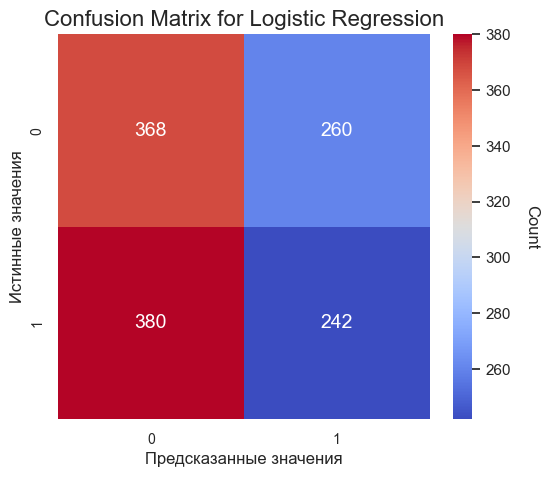

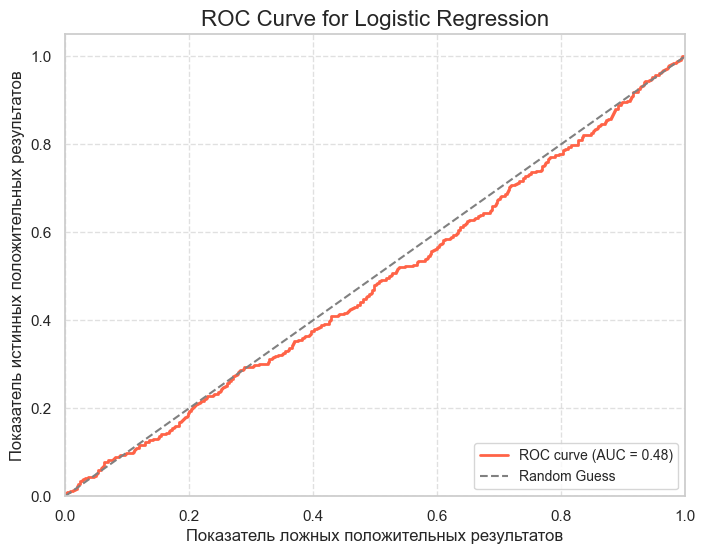


Random Forest Metrics:
Accuracy: 0.4936
Precision: 0.4906
Recall: 0.4630
F1-Score: 0.4764
ROC-AUC: 0.5052


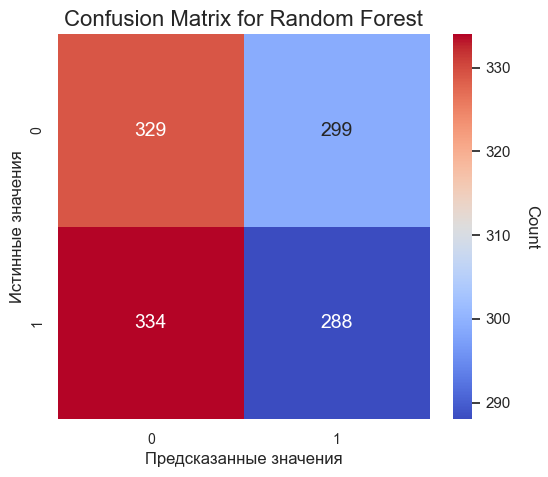

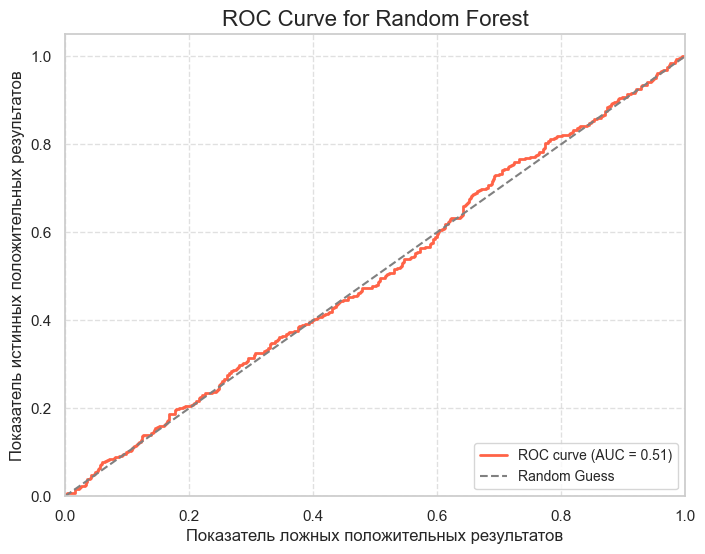


Gradient Boosting Metrics:
Accuracy: 0.4952
Precision: 0.4923
Recall: 0.4630
F1-Score: 0.4772
ROC-AUC: 0.4972


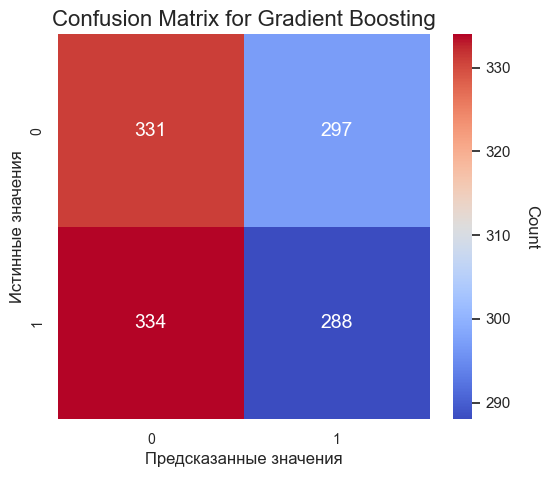

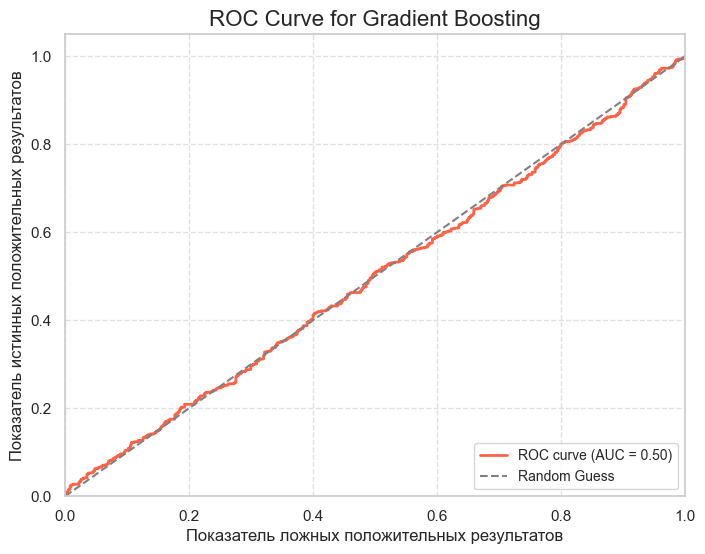

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

sns.set(style="whitegrid")

def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    ax = sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', cbar=True, annot_kws={"size": 14})
    plt.title(title, fontsize=16)
    plt.xlabel('Предсказанные значения', fontsize=12)
    plt.ylabel('Истинные значения', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    cbar = ax.collections[0].colorbar
    cbar.set_label('Count', rotation=270, labelpad=20, fontsize=12)
    plt.show() 

def plot_roc_curve(y_true, y_pred_proba, title):
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='#FF6347', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=1.5, label='Random Guess')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Показатель ложных положительных результатов', fontsize=12)
    plt.ylabel('Показатель истинных положительных результатов', fontsize=12)
    plt.title(title, fontsize=16)
    plt.legend(loc="lower right", fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

def evaluate_and_plot_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label=1)
    recall = recall_score(y_test, y_pred, pos_label=1)
    f1 = f1_score(y_test, y_pred, pos_label=1)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    
    print(f"\n{model_name} Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")
    
    plot_confusion_matrix(y_test, y_pred, f'Confusion Matrix for {model_name}')
    plot_roc_curve(y_test, y_pred_proba, f'ROC Curve for {model_name}')

evaluate_and_plot_model(logreg_best_model, X_test, y_test, 'Logistic Regression')
evaluate_and_plot_model(rf_best_model, X_test, y_test, 'Random Forest')
evaluate_and_plot_model(xgb_best_model, X_test, y_test, 'Gradient Boosting')

**Вывод по результатам задач классификации**  
Результаты обучения моделей для задачи классификации направления изменения цены показали, что качество прогнозирования остаётся на уровне случайного угадывания.

**Анализ метрик для моделей:**

- **Логистическая регрессия:** Данная модель показала точность (Accuracy) 0.4880 и F1-меру 0.4306. Значения Precision (0.4821) и Recall (0.3891) также указывают на трудности модели с корректной классификацией. ROC-AUC на уровне 0.4836 близок к случайному значению (0.5), что говорит о слабой предсказательной способности.

- **Случайный лес:** Случайный лес продемонстрировал лучшие результаты по сравнению с логистической регрессией: точность 0.4936 и F1-меру 0.4764. Метрика ROC-AUC составила 0.5052, что превышает уровень случайного угадывания, но не является достаточным показателем качества.

- **Градиентный бустинг:** Градиентный бустинг показал схожие результаты со случайным лесом: точность 0.4952, F1-меру 0.4772, и ROC-AUC на уровне 0.4972. Данные значения говорят о том, что, несмотря на сложности задачи, эта модель на данный момент является наилучшей из предложенных.